# Machine learning - Assignment 4 - Classification
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

## Introduction

In this assignment, we were first tasked with answeriing and discussing differences between classification models, such as, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and k-nearest neighbor (KNN). The later practical part of this assignment involves implementing using the 'Smarket.csv' dataset which is a financial dataset that containst stock market returns. The classification models will be used to predict market movements. Conclusions and interpretations of the outputs will also be made in this notebook to make it clearer as to how and why certain calculations are computed and what their results indicate.

For many of the explanations i will use [this source](https://rdrr.io/cran/ISLR/man/Smarket.html) as a reference for what the columns means. Theese short descriptions were of great help to me.

## Conceptual Questions

**1. Discuss the differences between LDA and QDA in terms of their main assumptions
about classes, decision boundaries, number of samples, and overfitting**

The main assumption that LDA makes about classes is that LDA assumes that the different classes follow a _multivariate normal distribution with a common covaraince matrix_. In this case, a class is a 'value' that a classification variable/column/feature can take. So for example, the two classes in the smarket.csv file can be found under the **Direction** column and they are **up** and **down**. But what do i mean by common covariance matrix? Well, a covariance matrix is a square matrix that contains the covariances between all pairs of features. It is used to model the distribution of the data and to determine the shape of decision variables in classification. On the other hand, QDA makes the assumption that each class should have its own covariance matrix so for the smarket dataset, this would mean that the classes **up** and **down** have their own covariance matrix. In practice, it would mean that the covariance matrix for LDA would look something like this (not a guarantee that this is 100% correct, its more of a 'proof of concept').

$$
\Sigma =
\begin{bmatrix}
\text{Var}(\text{Lag1}) & \text{Cov}(\text{Lag1}, \text{Lag2}) & \text{Cov}(\text{Lag1}, \text{Lag3}) & \text{Cov}(\text{Lag1}, \text{Volume}) \\
\text{Cov}(\text{Lag2}, \text{Lag1}) & \text{Var}(\text{Lag2}) & \text{Cov}(\text{Lag2}, \text{Lag3}) & \text{Cov}(\text{Lag2}, \text{Volume}) \\
\text{Cov}(\text{Lag3}, \text{Lag1}) & \text{Cov}(\text{Lag3}, \text{Lag2}) & \text{Var}(\text{Lag3}) & \text{Cov}(\text{Lag3}, \text{Volume}) \\
\text{Cov}(\text{Volume}, \text{Lag1}) & \text{Cov}(\text{Volume}, \text{Lag2}) & \text{Cov}(\text{Volume}, \text{Lag3}) & \text{Var}(\text{Volume})
\end{bmatrix}
$$

But for QDA we have _two_ matrices, one for each class.

$$
\Sigma{\text{Up}} =
\begin{bmatrix}
\text{Var}(\text{Lag1}) & \text{Cov}(\text{Lag1}, \text{Lag2}) & \cdots \\
\text{Cov}(\text{Lag2}, \text{Lag1}) & \text{Var}(\text{Lag2}) & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

$$
\Sigma{\text{Down}} =
\begin{bmatrix}
\text{Var}(\text{Lag1}) & \text{Cov}(\text{Lag1}, \text{Lag2}) & \cdots \\
\text{Cov}(\text{Lag2}, \text{Lag1}) & \text{Var}(\text{Lag2}) & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

Now when this is clear, i can now discuss the assumptions about decision boundaries, number of samples and overfitting as all of them are kind of an effect from the fact that the covaraince matrices are different like this.

The decision boundaries for LDA is always a linear hyperplane. So it can either be a straight line if it's in 2D or it can be a straight plane if it's in 3D (i mean it can "tilt" but the plane itself can not bend or curve). This makes sence since all classes share the same covariance structure. However, in QDA, we allow each class to have its own covariance matrix, so the decision bounds is quadratic, meaning it can be a curved (non-linear) hyperplane in 3D. This means that LDA is best suited for problems where the class distributions are linearly separable.

LDA requires fewer training samples since it estimates only one covariance matrix shared across all classes while QDA requires significantly more training data because it must estimate a separate covariance matrix for each class. We can also see that this relationship can be mathematically shown since LDA requires $d(d + 1)/2$ for d predictor variables while QDA needs $C * (d(d + 1)/2)$ parameters where $C$ is the amount of classes. So, as we can see, this would scale very aggresively if we have a lot of classes in our data since we would have to multiply the amount of classes in QDA as opposed to LDA where we only take the predictors in to account.

When it comes to overfitting, i would say that LDA probably has a less chance to overfit on some generic dataset because strong assumptions are made about the distribution of classes (same covariance matrices/structure) and uses much less parameters especially for data with a lot of classes. But QDA is probably more prone to overfitting, especially with less data, because it models each class separately with more parameters.

**2. Regarding KNN**

**a) How does the choice of distance metric affect the performance of KNN classification?**

In the KNN (K- nearest neighbor) algorithm, the algorithms classifies a new data point by looking at the 'k' closest training points and assigning the majorit class among them. The way the distance metric is calculated (basically, the range of what to include in K) will directly impact what is considered a 'neighbor' which also impacts how accurate the classification is and how sensitive the KNN algorithm is to certain features.

There are actually a lot of different ways of calculating the distance metric since it is not that different from calculating any other distance in mathematics. The way of calculating distance that i have learnt from mainly linear algebra but also numerical methods and optimization courses and that i am most familiar with is _euclidean distance_ which is just the line segment between two points. It is easily and intuitively calculated like this: $d(x, y) = \sqrt{\sum(x_i - y_i)^2}$

This formula measures straight line distances works well when all features have the same scale and are independent of each other which makes it applicable for a wide range of simpler data but if we have data features with different scales (like age in years and salary in thousands of dollars), the salary will dominate the age by a lot so we would have to find a way to normalize our data to [0, 1] ranges in order to prevent features to overwhelm others.

There are also other ways of calculating distances but many of them have their pro's and cons so chosing a method really depends on the data itself.

**b) please also discuss the concept of the curse of dimensionality and its implications for KNN algorithm**

The curse of dimensionality is a problem when working with data that has a lot of dimensions (features) and data points become more and more sparse. This makes it difficult for distance based learning algorithms (like KNN) to work efficiently. This is because in high dimensional spaces, the distance between points tend to be further away from each other which makes it so that the meaning of _closeness_ becomes meaningless and the distance metrics become less and less reliable.


## Practical

For the practical part of the assignment, i have to work with the smarket.csv dataset which consists of percentage returns for a stock index over 1250 days. During this practical part, i will show off some logistic regression models and also perform LDA and QDA as well as KNN models. A lot of code/syntax will be reused from my previous submissions as i can easily just change some arguments in order to make it work properly. And also, i quite like my previous submissions.

### Load the data and get an overview of the data

In [1]:
import pandas as pd # Never coded in R before but this seems to be the equivalent of library(pandas) in R
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

# load Smarket.csv
smarket = pd.read_csv('Smarket.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

Once the dataset is loaded, we can display the number of predictors (variables/columns) and their names.

In [2]:
numFeatures = smarket.shape[1]
print(numFeatures)

featureNames = smarket.columns.tolist()
print(featureNames, end="\n\n")

10
['Unnamed: 0', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']



We can now also print a statistic summary of the predictors and responses. i however need to enumerate the Direction feature myself since pandas cant do that by default.

In [3]:
print(smarket.describe(), end="\n\n")

# I count the categorical separate instances manually as i couldnt find a good function to do it. 
categorical_columns = smarket.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Summary for {col}:")
    print(smarket[col].value_counts(), end="\n\n")


        Unnamed: 0         Year         Lag1         Lag2         Lag3  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean    625.500000  2003.016000     0.003834     0.003919     0.001716   
std     360.988227     1.409018     1.136299     1.136280     1.138703   
min       1.000000  2001.000000    -4.922000    -4.922000    -4.922000   
25%     313.250000  2002.000000    -0.639500    -0.639500    -0.640000   
50%     625.500000  2003.000000     0.039000     0.039000     0.038500   
75%     937.750000  2004.000000     0.596750     0.596750     0.596750   
max    1250.000000  2005.000000     5.733000     5.733000     5.733000   

              Lag4        Lag5       Volume        Today  
count  1250.000000  1250.00000  1250.000000  1250.000000  
mean      0.001636     0.00561     1.478305     0.003138  
std       1.138774     1.14755     0.360357     1.136334  
min      -4.922000    -4.92200     0.356070    -4.922000  
25%      -0.640000    -0.64000     1.2

We can now also display the number of datapoints:

In [4]:
print("total amount of datapoints: ", smarket.shape[0], end="\n\n")

total amount of datapoints:  1250



In [5]:
smarket

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...,...
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


We can now compute the pairwise correlation of the predictors in the dataset. We can do this by plotting the correlation matrix between the pairwise features. In the example, i can see that the direction feature was dropped (probably because its a classification feature) so i did the same in my demonstration.

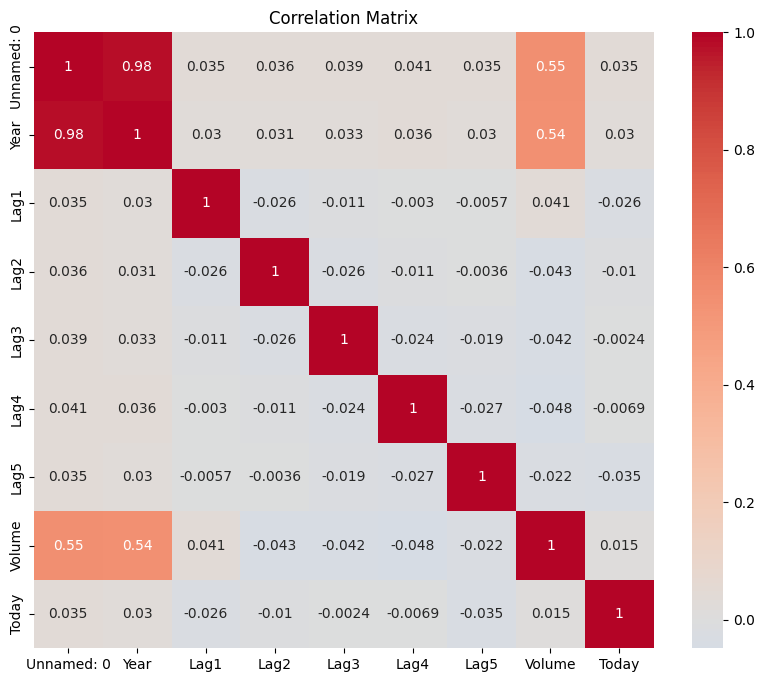

In [6]:
# drop direction column
smarket = smarket.drop(columns=['Direction'])

correlation_matrix = smarket.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

INTERPRET THE RESULTS

We can now also plot the correlated predictors 'volume' and year.

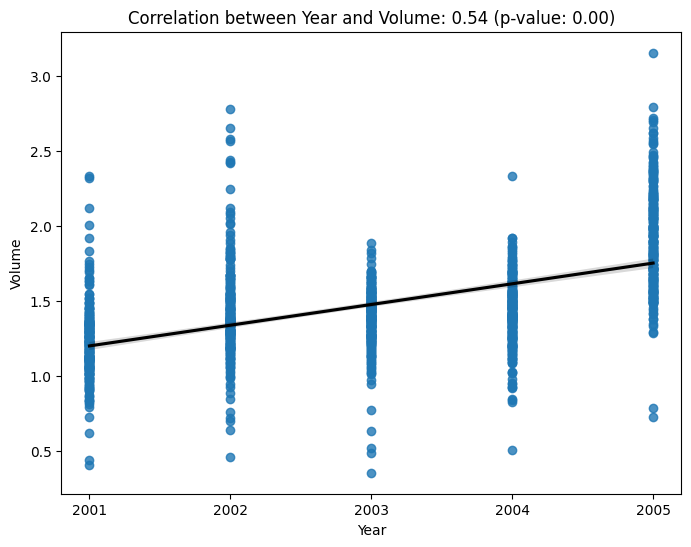

In [7]:
correlation_year_volume, p_value_year_volume = stats.pearsonr(smarket['Year'], smarket['Volume'])

plt.figure(figsize=(8, 6))
sns.regplot(x="Year", y="Volume", data=smarket, line_kws={'color':'black'})

# Ensure only whole numbers for years
plt.xticks(np.arange(smarket["Year"].min(), smarket["Year"].max() + 1, 1))

plt.title(f"Correlation between Year and Volume: {correlation_year_volume:.2f} (p-value: {p_value_year_volume:.2f})")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

INTERPRETATION OF RESULTS

### Perform logistic regressions

For this model, i want to use the _Direction_ feature as my response variable and i want to use all remaining available features as my predictor variables.

But of course, since Direction is categorical, python does not handle it very well so we have to convert it to dummy data. But luckily for us, there are only 2 classes in Direction, so we can just make the data binary instead. So for the 'Down' class, i will instead replace it by 0 and for the 'Up' class i will just make it 1.

In [ ]:

smarket = pd.read_csv('Smarket.csv') # reload the data again since i dropped direction earlier

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0}) # convert to binary

log_reg_model = sm.Logit(smarket['Direction'], sm.add_constant(smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])).fit()
log_reg_model.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sat, 22 Feb 2025   Pseudo R-squ.:                0.002074
Time:                        18:25:44   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

INTERPRETATION OF RESULTS

### Use the logistic regression models

Now i will use the log_reg_model to predict the probability that the market will go up, given the values of the predictors.

In [14]:
probs = log_reg_model.predict()

print(probs[0:10])

[0.50708413 0.48146788 0.48113883 0.51522236 0.51078116 0.50695646
 0.49265087 0.50922916 0.51761353 0.48883778]
